<a href="https://colab.research.google.com/github/Esmtra/Machine_Vision_final_project/blob/main/MV_Project_Milestone_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Team Names**
Eslam Sayed Rady                                 ----------------                                  1902236  
Mohamed Hussein Adel  --------                                                      1802683

Abdelrahman Adel Saeed     ------                                                1805626

---




# **Over View**

It's a major task for Machine Vision course 2022

First milestone : it's required to explore different techniques used in image
classification. Different classifiers should be implemented and used to classify RGB images to different categories. Then compare the results of
each classifier and decide which one has the best performance.
1. Feature extraction: HOG feature

2.   Traditional classifier : ( KNN, K-means, and SVM )

------- with cifar100  data set 

**The vision pipeline**
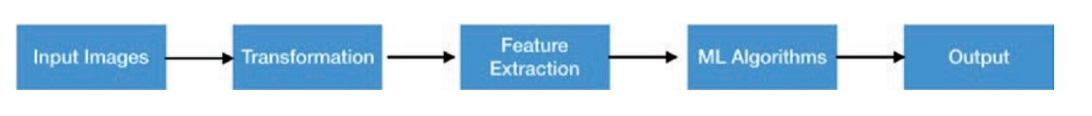



---



# **Import Libraries**

In [ ]:
# Importing required libraries
import keras
import cv2
import numpy as np
from scipy.spatial.distance import cdist
from copy import deepcopy
import matplotlib.pyplot as plt
from keras.datasets import cifar100
import pandas as pd
from sklearn.metrics import accuracy_score

# Importing required libraries for KNN algorithm
from scipy.spatial import distance

# Importing required libraries for SVM algorithm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# **Input Image**
**From cifar100 data set** 
50000 training and 10000 testing 

169001437/169001437 [==============================] - 4s 0us/step


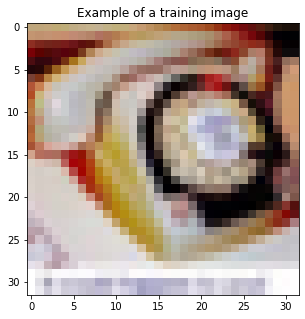

Shape of training data: (50000, 32, 32, 3)
Shape of training labels: (50000, 1)
Shape of test data: (10000, 32, 32, 3)
Shape of test labels: (10000, 1)


In [ ]:
# Loading the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Visualizing an image from the training set
plt.figure(figsize=(5,5))
plt.imshow(x_train[5], cmap='gray')
plt.title("Example of a training image")
plt.show()

# Printing the shape of the training and test sets
print("Shape of training data:", x_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of test data:", x_test.shape)
print("Shape of test labels:", y_test.shape)


# Histogram of Oriented Gradients
**Features Extraction Using Opencv**

In [ ]:
def compute_HOG(img):
    """
    Compute Histogram of Gradients (HOG) of an image using OpenCV.
    :param img: The input image.
    :return: The HOG descriptor of the image.
    """
    win_size = (32, 32)
    block_size = (8, 8)
    block_stride = (2, 2)
    cell_size = (4, 4)
    n_bins = 9
    descriptor = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, n_bins)
    hog_descriptor = descriptor.compute(img)
    return hog_descriptor

 **Visualize HOG**

In [ ]:
# Initializing lists to store features of the data
hog_train_features = []
hog_test_features = []

In [ ]:
# Extracting HOG features from the training data
for imgr in x_train:
    hog_train_features.append(compute_HOG(imgr))

# Reshaping the HOG features to a 1D array
hog_train_features = np.array(hog_train_features).reshape(len(x_train), -1)

# Extracting HOG features from the test data
for imgs in x_test:
    hog_test_features.append(compute_HOG(imgs))

# Reshaping the HOG features to a 1D array
hog_test_features = np.array(hog_test_features).reshape(len(x_test), -1)


In [ ]:
# Printing the shape of the HOG features of the training and test data
print("Shape of HOG features of the training data:", hog_train_features.shape)
print("Shape of HOG features of the test data:", hog_test_features.shape)

# # Uncomment the following lines to visualize the HOG features
# plt.plot(hog_train_features)
# plt.plot(hog_test_features)
# plt.show()


Shape of HOG features of the training data: (50000, 6084)
Shape of HOG features of the test data: (10000, 6084)


# **Traditional classifier**

# Calculate The accuracy

The accuracy of a KNN classifier is determined by how well it can predict the correct class label for a given test set

In [ ]:
def calculate_accuracy(predictions, true_labels):
    """
    Function to calculate the accuracy of the predictions.
    :param predictions: The predictions made by the model.
    :param true_labels: The true labels of the data.
    :return: The accuracy of the predictions (float).
    """
    correct_count = 0
    for i in range(len(predictions)):
        if predictions[i] == true_labels[i]:
            correct_count += 1
    return correct_count / len(true_labels)



---





---



# KNN Classifier

We need to calculate the distance between a given data point and all other points in the dataset.

In [ ]:
def get_nearest_neighbors(train_data, test_data, k):
    """
    Function to get the indices and distances of the k nearest neighbors of the test data from the train data.
    :param train_data: The data on which the model is trained.
    :param test_data: The data on which the model is tested.
    :param k: The number of nearest neighbors to consider.
    :return: A tuple of the nearest neighbor indices and distances
    """
    distances = cdist(train_data, test_data, 'euclidean')
    nearest_indices = np.argsort(distances, axis=0)[:k, :]
    nearest_distances = np.sort(distances, axis=0)[:k, :]
    return nearest_indices, nearest_distances

In [ ]:
# Selecting first 50000 training labels
training_labels = y_train[0:50000]
test_labels = y_test[0:10000]
# Printing the shape of the selected training labels
print("Shape of the selected training labels:", training_labels.shape)
print("Shape of the selected training labels:", test_labels.shape)

Shape of the selected training labels: (50000, 1)
Shape of the selected training labels: (10000, 1)


In [ ]:
def predict(train_data, train_labels, test_data, k):
    """
    Function to predict the labels of the test data using k-NN algorithm.
    :param train_data: The data on which the model is trained.
    :param train_labels: The labels of the training data.
    :param test_data: The data on which the model is tested.
    :param k: The number of nearest neighbors to consider.
    :return: The predicted labels of the test data.
    """
    # Getting the nearest neighbors
    nearest_indices,nearest_distances = get_nearest_neighbors(train_data, test_data, k)
    print("INDshape:",nearest_indices.shape)
    print("DISshape:",nearest_distances.shape)  
    # Reshaping the labels to match with indices
    train_labels_K = train_labels.flatten()
    INDrows, INDcolumns = nearest_indices.shape 
    # Initializing an empty list to store predictions
    predictions = []
    # Iterating over the nearest neighbors
    for col in range(INDcolumns):
        # Initializing a temporary list to store labels of nearest neighbors
        temp_labels = []
        for row in range(INDrows):
          cell = nearest_indices[row][col]
          temp_labels.append(train_labels_K[cell])
          
        # Appending the most frequent label to the predictions list
        predictions.append(max(set(temp_labels), key = temp_labels.count))
    # Converting the predictions list to numpy array
    predictions = np.array(predictions)
    return predictions


In [ ]:
# Getting the predictions of first 2000 test samples with 3 nearest neighbors
predictions = predict(hog_train_features[0:50000], training_labels, hog_test_features[0:10000], 4)

# Printing the shape of the predictions
print("Shape of the predictions:", predictions.shape)

In [ ]:
# Calculating the accuracy
Accuracy = calculate_accuracy(training_labels, predictions)

# Printing the accuracy
print("Accuracy: {:.2f}%".format(Accuracy * 100))


# KMeans Classifier

Mainly,KMeans is a clustering algorithm which is used to group data points into clusters

In [ ]:
def euclidean_distance(x1, x2):
    """Calculate the Euclidean distance between two vectors x1 and x2."""
    # Ensure that the inputs are of the same length
    assert len(x1) == len(x2), f'Inputs must be of the same length. x1 is {len(x1)} and x2 is {len(x2)}'
    # Calculate the difference and square it
    difference = [(a - b)**2 for a, b in zip(x1, x2)]
    # Take the square root of the sum of the differences
    euclidean_distance = np.sqrt(sum(difference))
    return euclidean_distance

In [ ]:
def minimum_distance(X1, X2):
    """Calculate the minimum Euclidean distance between each point in X1 and all points in X2, 
    as well as the indices of the nearest point in X2 for each point in X1."""
    
    distances = cdist(X1, X2, 'euclidean')
    nearest_points_indices = np.argmin(distances, axis=1)
    return distances, nearest_points_indices


In [ ]:
def KMeans(X, k, max_Iterations, epsilon=1e-3):
    """
    Perform K-Means clustering on the input data.

    Parameters:
        - X (np.ndarray): The input data to be clustered.
        - k (int): The number of clusters.
        - max_iterations (int): The maximum number of iterations to run the algorithm.
        - epsilon (float): The convergence threshold.

    Returns:
        - clus (np.ndarray): The cluster assignments for each data point.
        - centroids_new (np.ndarray): The final cluster centroids.
    """
    max_it = max_Iterations
    count = 0
    idx = np.random.choice(len(X), k, replace=False) 
    centroids = X[idx,:] 
    distances, clus = minimum_distance(X, centroids) 
    centroids_new = np.zeros(centroids.shape)
    error = cdist(centroids_new, centroids, 'euclidean')
    error = np.linalg.norm(error, ord=1)

    while (error > epsilon) and (count <= max_it):

        for i in range(k):

          points = list()
          centroids = deepcopy(centroids_new)
          for j in range(len(X)):

             if clus[j] == i:
               points.append(X[j])

          points = np.array(points)
          centroids_new[i] = np.mean(points,axis=0)

        distances, clus = minimum_distance(X, centroids_new)
        error = cdist(centroids_new, centroids, 'euclidean')
        error = np.linalg.norm(error, ord=1)
        count += 1
  
    return clus, centroids_new


In [ ]:
def sum_squared_error(X, clus, centroids):
    """
    Calculate the sum of squared errors between each sample in X and its corresponding cluster center.

    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        The input data.
    clus : array-like, shape (n_samples,)
        The cluster indices of each sample in X.
    centroids : array-like, shape (n_clusters, n_features)
        The cluster centers.
        
    Returns
    -------
    sse : float
        The sum of squared errors.
    """
    errors = []
    # Calculate the error for each sample
    for i in range(len(X)):
        centroid = centroids[clus[i]]
        error = np.linalg.norm(np.array(X[i]) - np.array(centroid))
        errors.append(error**2)
    # Return the sum of the errors
    sse = sum(errors)
    return sse


In [ ]:
# Perform K-Means clustering
clusters = KMeans(hog_train_features[0:40000],100,5)
print("Clusters shape: ", clusters[0].shape)

# Calculate accuracy
accuracy = calculate_accuracy(clusters[0], training_labels.flatten())
print("Accuracy = {:.2f}%".format(accuracy * 100))


In [ ]:
sse = []
k_range = range(10, 100, 10)
for k in k_range:
    # Perform K-Means clustering
    km = KMeans(hog_train_features[0:40000], k, 10)
    # Calculate SSE
    sse.append(sum_squared_error(hog_train_features[:20000], km[0], km[1]))

# Plot the results
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.plot(k_range, sse)
plt.show()




---



# SVM classifier

In [ ]:
# Create an instance of a radial basis function kernel SVM
svm = SVC(kernel='rbf')

# Fit the model to the training data
svm.fit(hog_train_features, y_train.flatten())

# Predict the labels of the test set
y_pred = svm.predict(hog_train_features)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))
